#                                                 ***CREATE A CHATBOT IN PYTHON***

**Phase 3:**  Development Part 1

***Introduction:***

In the world of conversational AI and chatbot development, there exists a series of fundamental steps that lay the groundwork for transforming human language into machine-understandable data. These steps are pivotal in constructing chatbots that can interact seamlessly with users, comprehend their queries, and respond intelligently. Let's embark on a brief journey through each of these steps that collectively serve as the cornerstone of a successful chatbot project.

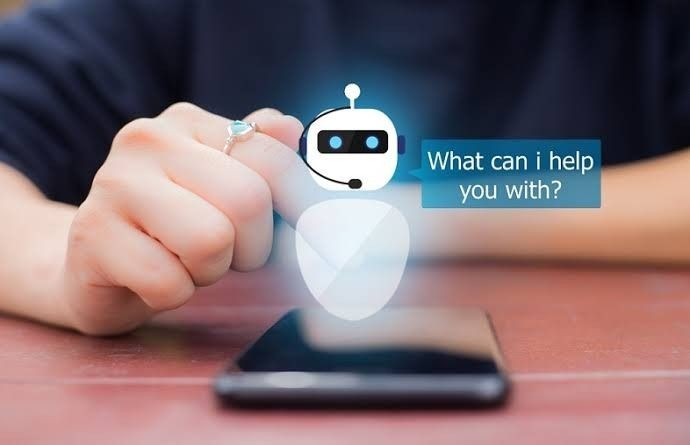

#         ***1.Loading Dataset***

In [1]:
!pip install opendatasets
import opendatasets as od

In [ ]:
od.download(r'https://www.kaggle.com/datasets/grafstor/simple-dialogs-for-chatbot/data')

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("/content/simple-dialogs-for-chatbot/dialogs.txt", sep='\t')

In [6]:
df.head()

,"hi, how are you doing?",i'm fine. how about yourself?
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?


In [7]:
df.tail()

,"hi, how are you doing?",i'm fine. how about yourself?
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.
3723,but i do all my writing with my right hand.,start typing instead. that way your left hand ...


In [8]:
df

,"hi, how are you doing?",i'm fine. how about yourself?
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [9]:
df.columns=['Questions','Answers']

In [10]:
df

,Questions,Answers
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [11]:
df.dtypes

Questions    object
Answers      object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  3724 non-null   object
 1   Answers    3724 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


# ***2.Data Preprocessing***

---



*   Tokenization
*   Stopword Removal
*   Lemmatization
*   Vocabulary Creation
*   Numerical Representation
















In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---
### ***1.Tokenization :***


---



In [16]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [17]:
# Text Lowercasing
df['Questions'] = df['Questions'].apply(lambda x: x.lower())
df['Answers'] = df['Answers'].apply(lambda x: x.lower())




---


**Text Lowercasing:** This code converts the text in the 'Questions' and 'Answers' columns of DataFrame 'df' to lowercase using Python's **apply** function and a lambda function.

---



In [18]:
# Tokenization
df['Tokenized_Questions'] = df['Questions'].apply(lambda x: word_tokenize(x))
df['Tokenized_Answers'] = df['Answers'].apply(lambda x: word_tokenize(x))



---


**Tokenization:** This code tokenizes the text in 'Questions' and 'Answers'
 columns of DataFrame 'df' into lists of words using NLTK's **word_tokenize** function and stores them in new columns.


---



In [19]:
# Removing Punctuation
punctuations = string.punctuation
df['Tokenized_Questions'] = df['Tokenized_Questions'].apply(lambda x: [word for word in x if word not in punctuations])
df['Tokenized_Answers'] = df['Tokenized_Answers'].apply(lambda x: [word for word in x if word not in punctuations])



---


**Removing Punctuation:** This code filters out punctuation from tokenized words in 'Tokenized_Questions' and 'Tokenized_Answers' columns of DataFrame 'df' using list comprehension and the **string.punctuation** set.


---



---

### ***2.Stopword Removal :***

---



In [20]:
# Stopword Removal
stop_words = set(stopwords.words('english'))
df['Tokenized_Questions'] = df['Tokenized_Questions'].apply(lambda x: [word for word in x if word not in stop_words])
df['Tokenized_Answers'] = df['Tokenized_Answers'].apply(lambda x: [word for word in x if word not in stop_words])



---


**Stopword Removal:** This code removes stopwords from tokenized words in 'Tokenized_Questions' and 'Tokenized_Answers' columns of DataFrame 'df' using a list comprehension and the NLTK English stopwords set.


---



In [21]:
# Display the preprocessed DataFrame
print("Preprocessed DataFrame:")
df[['Tokenized_Questions', 'Tokenized_Answers']]



Preprocessed DataFrame:


,Tokenized_Questions,Tokenized_Answers
0,"['m, fine]","['m, pretty, good, thanks, asking]"
1,"['m, pretty, good, thanks, asking]",[problem]
2,[problem],"['ve, great]"
3,"['ve, great]","['ve, good, 'm, school, right]"
4,"['ve, good, 'm, school, right]","[school, go]"
...,...,...
3719,"['s, good, question, maybe, 's, old, age]",[right-handed]
3720,[right-handed],"[yes, life]"
3721,"[yes, life]","['re, wearing, right, hand, stop, using, much]"
3722,"['re, wearing, right, hand, stop, using, much]","[writing, right, hand]"


The code will display the 'Tokenized_Questions' and 'Tokenized_Answers' columns of the DataFrame 'df', showcasing the preprocessed data.

---
### ***3.Lemmatization :***




---



In [22]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [23]:
import nltk

# Download the required resource
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
import nltk

# Download the required resource
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
  # default to noun

def lemmatize_sentence(tokens):
    # Get the POS tags for the tokens
    pos_tags = nltk.pos_tag(tokens)
    # Map POS tags to WordNet POS
    wordnet_tags = [get_wordnet_pos(tag) for word, tag in pos_tags]
    # Lemmatize using WordNet POS
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos) for word, pos in zip(tokens, wordnet_tags)]
    return lemmatized_tokens

# Lemmatize the words in each sentence and join them into strings
df['Lemmatized_Questions'] = df['Tokenized_Questions'].apply(lemmatize_sentence)
df['Lemmatized_Answers'] = df['Tokenized_Answers'].apply(lemmatize_sentence)

# Display the preprocessed DataFrame
print("Preprocessed DataFrame:")
df[['Lemmatized_Questions', 'Lemmatized_Answers']]

Preprocessed DataFrame:


,Lemmatized_Questions,Lemmatized_Answers
0,"['m, fine]","['m, pretty, good, thanks, ask]"
1,"['m, pretty, good, thanks, ask]",[problem]
2,[problem],"['ve, great]"
3,"['ve, great]","['ve, good, 'm, school, right]"
4,"['ve, good, 'm, school, right]","[school, go]"
...,...,...
3719,"['s, good, question, maybe, 's, old, age]",[right-handed]
3720,[right-handed],"[yes, life]"
3721,"[yes, life]","['re, wear, right, hand, stop, use, much]"
3722,"['re, wear, right, hand, stop, use, much]","[write, right, hand]"


This code defines a lemmatization function and applies it to tokenize sentences, resulting in lemmatized versions of 'Tokenized_Questions' and 'Tokenized_Answers' columns stored in 'Lemmatized_Questions' and 'Lemmatized_Answers'for display in the DataFrame.

In [26]:
df

,Questions,Answers,Tokenized_Questions,Tokenized_Answers,Lemmatized_Questions,Lemmatized_Answers
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,"['m, fine]","['m, pretty, good, thanks, asking]","['m, fine]","['m, pretty, good, thanks, ask]"
1,i'm pretty good. thanks for asking.,no problem. so how have you been?,"['m, pretty, good, thanks, asking]",[problem],"['m, pretty, good, thanks, ask]",[problem]
2,no problem. so how have you been?,i've been great. what about you?,[problem],"['ve, great]",[problem],"['ve, great]"
3,i've been great. what about you?,i've been good. i'm in school right now.,"['ve, great]","['ve, good, 'm, school, right]","['ve, great]","['ve, good, 'm, school, right]"
4,i've been good. i'm in school right now.,what school do you go to?,"['ve, good, 'm, school, right]","[school, go]","['ve, good, 'm, school, right]","[school, go]"
...,...,...,...,...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?,"['s, good, question, maybe, 's, old, age]",[right-handed],"['s, good, question, maybe, 's, old, age]",[right-handed]
3720,are you right-handed?,yes. all my life.,[right-handed],"[yes, life]",[right-handed],"[yes, life]"
3721,yes. all my life.,you're wearing out your right hand. stop using...,"[yes, life]","['re, wearing, right, hand, stop, using, much]","[yes, life]","['re, wear, right, hand, stop, use, much]"
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,"['re, wearing, right, hand, stop, using, much]","[writing, right, hand]","['re, wear, right, hand, stop, use, much]","[write, right, hand]"


---


### ***4.Vocabulary Creation :***

---



In [27]:
from gensim.models import Word2Vec
import gensim.downloader as api

# Train Word2Vec model
# You can use your own preprocessed data here
# Assuming 'df' contains your preprocessed DataFrame
# Concatenate all the tokenized sentences to train Word2Vec
tokenized_questions = df['Lemmatized_Questions'].tolist()
tokenized_answers = df['Lemmatized_Answers'].tolist()




This code imports necessary libraries, trains a Word2Vec model using preprocessed data from 'df', and stores tokenized sentences in 'tokenized_questions' and 'tokenized_answers' lists for training.

In [28]:
# Concatenate the tokenized questions and answers into a single list of lists
tokenized_sentences = tokenized_questions + tokenized_answers

---


### ***5.Numerical Representation :***

---



In [29]:
# Define and train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=11, window=8, min_count=1)

In [30]:
# Save the Word2Vec model
word2vec_model.save('word2vec_model.model')

In [31]:
# Load the trained Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.model')
def sentence_embedding(sentence):
    # Filter out words not in the word2vec vocabulary and obtain embeddings for each word
    word_embeddings = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]

    # If no valid words found (out-of-vocabulary), return zeros
    if not word_embeddings:
        return np.zeros(word2vec_model.vector_size)

    # Average the word embeddings to get the sentence embedding
    avg_sentence_embedding = np.mean(word_embeddings, axis=0)
    return avg_sentence_embedding

# Apply the function to each sentence
df['Question_Embedding'] = df['Lemmatized_Questions'].apply(sentence_embedding)
df['Answer_Embedding'] = df['Lemmatized_Answers'].apply(sentence_embedding)



---


This code loads a pre-trained Word2Vec model, computes sentence embeddings
using the model, and applies the embeddings to 'Lemmatized_Questions' and 'Lemmatized_Answers', storing the results in 'Question_Embedding' and 'Answer_Embedding' columns of the DataFrame.


---



In [32]:
df['Question_Embedding']

0       [-0.027918264, 0.83351225, 0.18007109, 0.61145...
1       [-0.036171693, 1.0134547, 0.1565976, 0.7533861...
2       [-0.049961377, 0.70177203, 0.13523504, 0.58655...
3       [-0.046830148, 1.1601774, 0.14402932, 0.725523...
4       [-0.09526434, 1.2834301, 0.22743902, 0.9067464...
                              ...                        
3719    [-0.04946988, 1.1171056, 0.20622106, 0.8366385...
3720    [0.036055986, -0.08427667, -0.08867717, 0.0035...
3721    [-0.038507495, 1.1367267, 0.14996223, 0.850169...
3722    [-0.073786445, 1.0204072, 0.19090316, 0.751823...
3723    [-0.11349427, 0.63813084, 0.10241339, 0.503651...
Name: Question_Embedding, Length: 3724, dtype: object

In [33]:
df['Answer_Embedding']

0       [-0.036171693, 1.0134547, 0.1565976, 0.7533861...
1       [-0.049961377, 0.70177203, 0.13523504, 0.58655...
2       [-0.046830148, 1.1601774, 0.14402932, 0.725523...
3       [-0.09526434, 1.2834301, 0.22743902, 0.9067464...
4       [-0.07078525, 1.3840549, 0.31158873, 0.932015,...
                              ...                        
3719    [0.036055986, -0.08427667, -0.08867717, 0.0035...
3720    [-0.038507495, 1.1367267, 0.14996223, 0.850169...
3721    [-0.073786445, 1.0204072, 0.19090316, 0.751823...
3722    [-0.11349427, 0.63813084, 0.10241339, 0.503651...
3723    [-0.068649456, 0.59437156, 0.09108728, 0.44184...
Name: Answer_Embedding, Length: 3724, dtype: object

In [34]:
df

,Questions,Answers,Tokenized_Questions,Tokenized_Answers,Lemmatized_Questions,Lemmatized_Answers,Question_Embedding,Answer_Embedding
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,"['m, fine]","['m, pretty, good, thanks, asking]","['m, fine]","['m, pretty, good, thanks, ask]","[-0.027918264, 0.83351225, 0.18007109, 0.61145...","[-0.036171693, 1.0134547, 0.1565976, 0.7533861..."
1,i'm pretty good. thanks for asking.,no problem. so how have you been?,"['m, pretty, good, thanks, asking]",[problem],"['m, pretty, good, thanks, ask]",[problem],"[-0.036171693, 1.0134547, 0.1565976, 0.7533861...","[-0.049961377, 0.70177203, 0.13523504, 0.58655..."
2,no problem. so how have you been?,i've been great. what about you?,[problem],"['ve, great]",[problem],"['ve, great]","[-0.049961377, 0.70177203, 0.13523504, 0.58655...","[-0.046830148, 1.1601774, 0.14402932, 0.725523..."
3,i've been great. what about you?,i've been good. i'm in school right now.,"['ve, great]","['ve, good, 'm, school, right]","['ve, great]","['ve, good, 'm, school, right]","[-0.046830148, 1.1601774, 0.14402932, 0.725523...","[-0.09526434, 1.2834301, 0.22743902, 0.9067464..."
4,i've been good. i'm in school right now.,what school do you go to?,"['ve, good, 'm, school, right]","[school, go]","['ve, good, 'm, school, right]","[school, go]","[-0.09526434, 1.2834301, 0.22743902, 0.9067464...","[-0.07078525, 1.3840549, 0.31158873, 0.932015,..."
...,...,...,...,...,...,...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?,"['s, good, question, maybe, 's, old, age]",[right-handed],"['s, good, question, maybe, 's, old, age]",[right-handed],"[-0.04946988, 1.1171056, 0.20622106, 0.8366385...","[0.036055986, -0.08427667, -0.08867717, 0.0035..."
3720,are you right-handed?,yes. all my life.,[right-handed],"[yes, life]",[right-handed],"[yes, life]","[0.036055986, -0.08427667, -0.08867717, 0.0035...","[-0.038507495, 1.1367267, 0.14996223, 0.850169..."
3721,yes. all my life.,you're wearing out your right hand. stop using...,"[yes, life]","['re, wearing, right, hand, stop, using, much]","[yes, life]","['re, wear, right, hand, stop, use, much]","[-0.038507495, 1.1367267, 0.14996223, 0.850169...","[-0.073786445, 1.0204072, 0.19090316, 0.751823..."
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,"['re, wearing, right, hand, stop, using, much]","[writing, right, hand]","['re, wear, right, hand, stop, use, much]","[write, right, hand]","[-0.073786445, 1.0204072, 0.19090316, 0.751823...","[-0.11349427, 0.63813084, 0.10241339, 0.503651..."


In [35]:
df['Answer_Embedding'][0]

array([-0.03617169,  1.0134547 ,  0.1565976 ,  0.75338614,  0.34325954,
        0.11904099,  0.3493063 ,  0.2880282 , -0.81359804, -0.00333644,
       -0.299879  ], dtype=float32)

In [36]:
df['Answer_Embedding'][1]

array([-0.04996138,  0.70177203,  0.13523504,  0.5865559 ,  0.20441721,
        0.06455152,  0.31814557,  0.31410313, -0.61145616,  0.07097436,
       -0.1382329 ], dtype=float32)

***Conclusion:***

These steps are essential for preparing and processing text data for your chatbot project. They help in cleaning and organizing the data, creating a numerical representation, and ensuring that the data is suitable for training and testing machine learning models. The specifics of each step may vary depending on the project's requirements and the tools and libraries you're using.

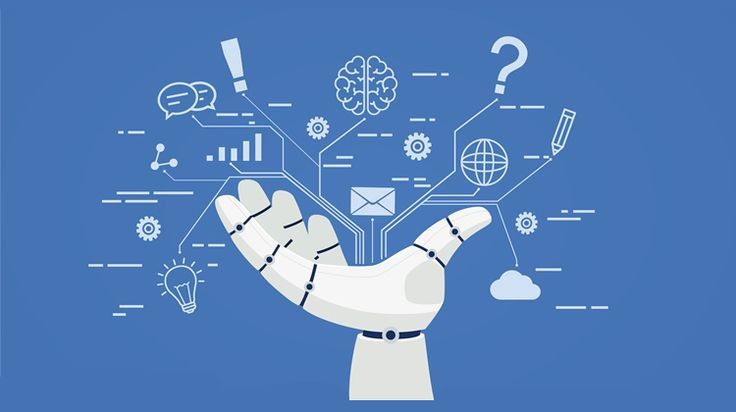